# Importar bibliotecas

In [3]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos:

In [4]:
housing= fetch_california_housing()

#Crear conjuntos de datos de entrenamiento, validación y prueba

In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('X_valid: ',X_valid.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)
print('y_valid: ',y_valid.shape)

X_train:  (11610, 8)
X_test:  (5160, 8)
X_valid:  (3870, 8)
y_train:  (11610,)
y_test:  (5160,)
y_valid:  (3870,)


# Escalar los datos

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Se crea el modelo de red neuronal

In [7]:
model= keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# Compilar modelo


In [8]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

# Entrenar el modelo

In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 0.8669 - root_mean_squared_error: 0.9311 - mean_absolute_percentage_error: 36.5804 - val_loss: 10.8616 - val_root_mean_squared_error: 3.2957 - val_mean_absolute_percentage_error: 38.2511
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5329 - root_mean_squared_error: 0.7300 - mean_absolute_percentage_error: 30.1090 - val_loss: 12.0930 - val_root_mean_squared_error: 3.4775 - val_mean_absolute_percentage_error: 37.4887
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5245 - root_mean_squared_error: 0.7242 - mean_absolute_percentage_error: 28.3259 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299 - val_mean_absolute_percentage_error: 28.0879
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4116 - root_mean_squared_error: 0.6415 - mean_absolute_percentage_error: 26.7584 - val_loss: 0.3793 - val_root_mean_squared_error: 0.6158 - va

# Graficar el historial de entrenamienrto

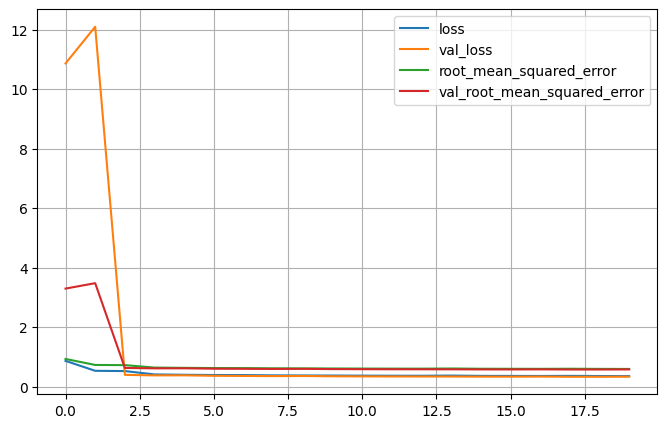

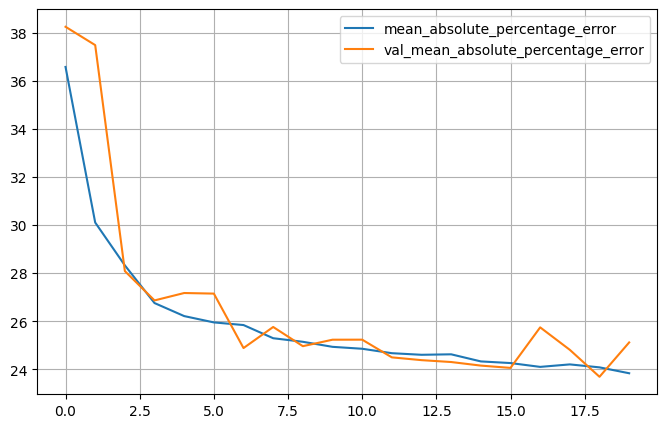

In [10]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss','root_mean_squared_error','val_root_mean_squared_error']].plot(figsize=(8,5), grid=True)
dfHistory[['mean_absolute_percentage_error','val_mean_absolute_percentage_error']].plot(figsize=(8,5), grid=True)
plt.show()

# Evaluar el modelo

In [11]:
loss,RMSE,MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print('loss train: ',loss)
print('RMSE train: ',RMSE)
print('MAPE train: ',MAPE)

loss,RMSE,MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print('loss valid: ',loss)
print('RMSE valid: ',RMSE)
print('MAPE valid: ',MAPE)

loss,RMSE,MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print('loss test: ',loss)
print('RMSE test: ',RMSE)
print('MAPE test: ',MAPE)

363/363 [==============================] - 1s 3ms/step - loss: 0.3539 - root_mean_squared_error: 0.5949 - mean_absolute_percentage_error: 24.4118
Evaluar el modelo en el conjunto de entrenamiento
loss train:  0.35385337471961975
RMSE train:  0.594855785369873
MAPE train:  24.41183853149414
121/121 [==============================] - 0s 2ms/step - loss: 0.3364 - root_mean_squared_error: 0.5800 - mean_absolute_percentage_error: 25.1205
Evaluar el modelo en el conjunto de validación
loss valid:  0.3364439904689789
RMSE valid:  0.5800378918647766
MAPE valid:  25.120487213134766
162/162 [==============================] - 0s 3ms/step - loss: 0.3541 - root_mean_squared_error: 0.5951 - mean_absolute_percentage_error: 25.2632
Evaluar el modelo en el conjunto de prueba
loss test:  0.35408931970596313
RMSE test:  0.595054030418396
MAPE test:  25.263160705566406


# Cuestionario


1.   ¿Qué conjunto de datos se utiliza en este
código y qué problema de aprendizaje
automático se aborda?

R./ Se utiliza el conjunto de datos de fetch_california_housing y se aborda el problema de predicción del precio de la vivienda con regresión.

2.   ¿Qué hace la función train_test_split() de
scikit-learn y por qué se utiliza en este
código?

R./ Está función permite hacer la división del conjunto de datos, de tal forma que se forman tres subconjuntos de datos, llamados train, test y valid.

3.   ¿Por qué es importante estandarizar los
datos antes de entrenar un modelo de
redes neuronales?

R./ Esto permite que el modelo se entrene de manera más eficiente cuando todos los datos manejan una escala, evitando que algunas caracteríticas dominen más que otras que pueden ser importantes.

4.   ¿Qué arquitectura de red neuronal se
utiliza en este código y cuántas capas
tiene?

R./ Es una arquitectura basada en un modelo secuencial que apila capas, tiene dos capas.

5.  ¿Qué función de activación se utiliza en la
capa oculta de la red neuronal y por qué
se elige esa función?

R./ La función de activación utilizadaes ReLU (Rectified Linear Unit). Se usa por Eficiencia Computacional, Mitigación del Desvanecimiento del Gradiente,Simplicidad y Desempeño.

6.  ¿Qué función de pérdida se utiliza para
compilar el modelo y qué métricas se
utilizan para evaluar su rendimiento?

R./ Se usa keras.metrics.RootMeanSquaredError(), las métricas usadas son: loss,
RMSE, MAPE.

7.  ¿Cuántas épocas se utilizan para entrenar
el modelo y por qué se elige ese número?

R./ Se usan 20 épocas de forma inicial para iniciar el entrenamiento de prueba y error
